In [3]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prophet as pt
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error
sns.set_style('whitegrid')
plt.style.use("default")
%matplotlib inline
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
yf.pdr_override()
from tensorflow.keras.models import load_model


d:\Time-series-forecasting\tsf\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
stock_symbol = ["MSFT", "AAPL", "GOOG", "META"]
start_date = dt.datetime(2013, 1, 1)
end_date = dt.datetime(2023, 6, 30)


In [5]:
for stock in stock_symbol:
    globals()[stock] = yf.download(stock, start_date, end_date)


company_list = [MSFT, AAPL, GOOG, META]
company_name = ["MICROSOFT", "APPLE", "GOOGLE", "FACEBOOK"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-15,272.299988,283.989990,271.420013,281.829987,281.829987,25973500,FACEBOOK
2023-06-16,284.750000,287.850006,280.130005,281.000000,281.000000,43102500,FACEBOOK
2023-06-20,278.730011,284.799988,276.220001,284.329987,284.329987,20701600,FACEBOOK
2023-06-21,283.529999,284.000000,278.359985,281.640015,281.640015,20556200,FACEBOOK
2023-06-22,279.079987,285.260010,277.790009,284.880005,284.880005,17563100,FACEBOOK
2023-06-23,281.510010,289.670013,278.950012,288.730011,288.730011,50988400,FACEBOOK
2023-06-26,288.700012,289.790009,277.600006,278.470001,278.470001,24232700,FACEBOOK
2023-06-27,282.010010,289.350006,280.649994,287.049988,287.049988,26108300,FACEBOOK
2023-06-28,284.820007,289.549988,284.059998,285.290009,285.290009,16722100,FACEBOOK


In [31]:
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2.641000e+03
mean,66.935187,67.688414,66.227058,66.990805,65.029027,1.662997e+08
std,51.920996,52.577073,51.320253,51.984769,52.416830,1.242884e+08
min,13.856071,14.271429,13.753571,13.947500,12.013327,3.519590e+07
25%,27.267500,27.557501,27.042500,27.285000,24.980261,8.796540e+07
50%,42.950001,43.282501,42.575001,42.962502,40.983185,1.263232e+08
75%,120.059998,121.430000,118.570000,119.989998,118.239395,2.000628e+08
max,189.080002,190.070007,188.940002,189.589996,189.334320,1.460852e+09


In [32]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2641 entries, 2013-01-02 to 2023-06-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2641 non-null   float64
 1   High          2641 non-null   float64
 2   Low           2641 non-null   float64
 3   Close         2641 non-null   float64
 4   Adj Close     2641 non-null   float64
 5   Volume        2641 non-null   int64  
 6   company_name  2641 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 165.1+ KB


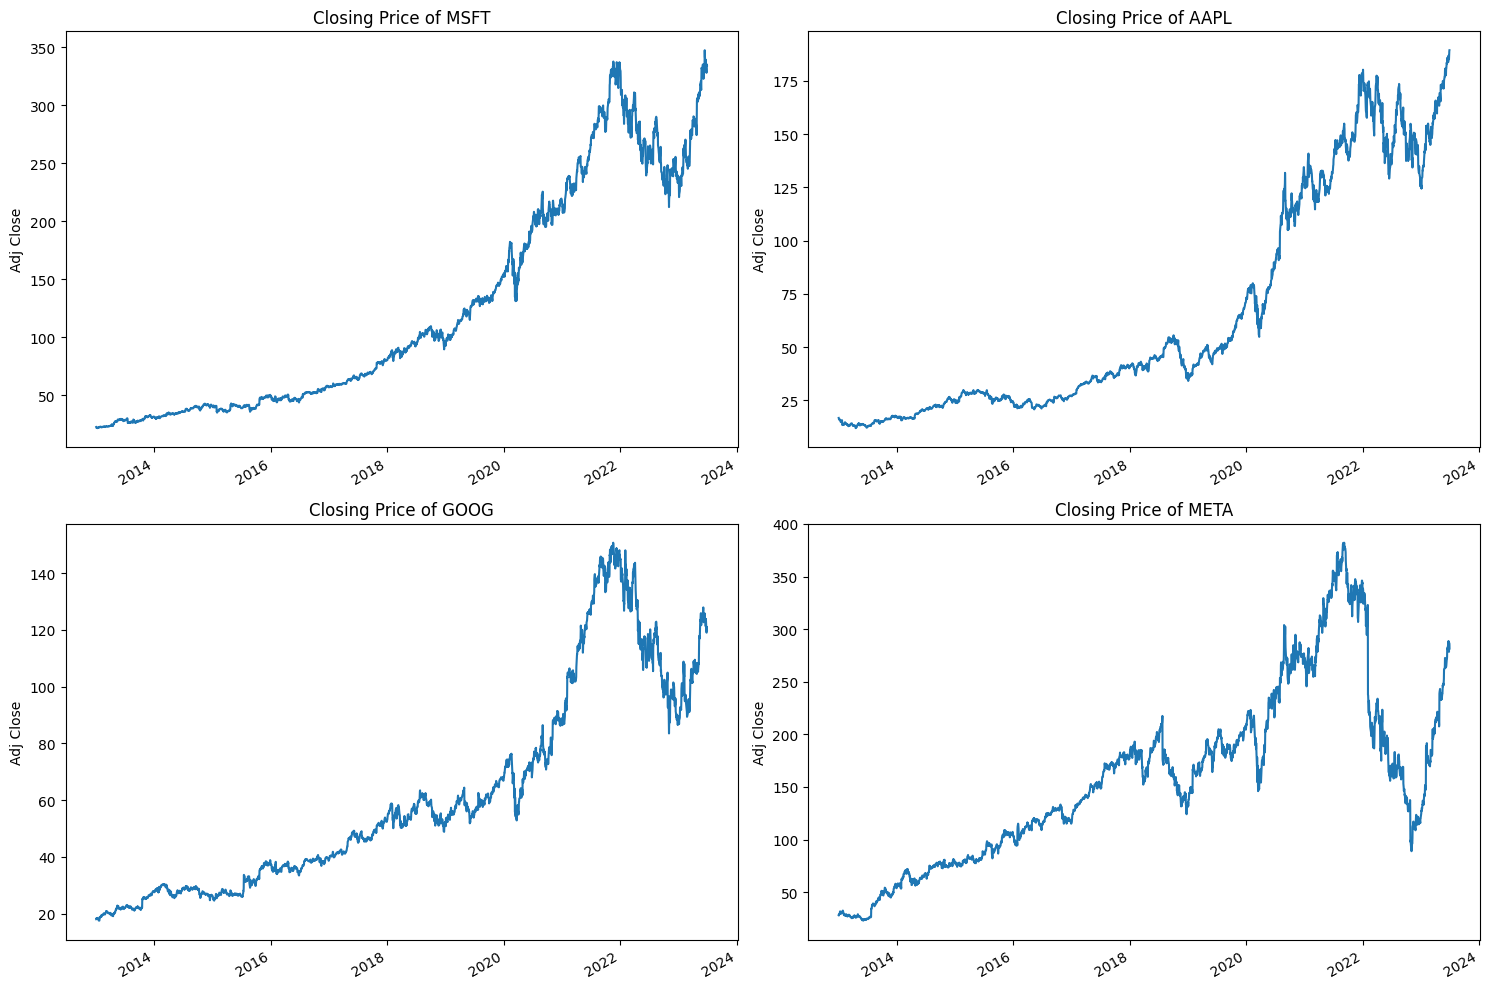

In [33]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_symbol[i - 1]}")

plt.tight_layout()


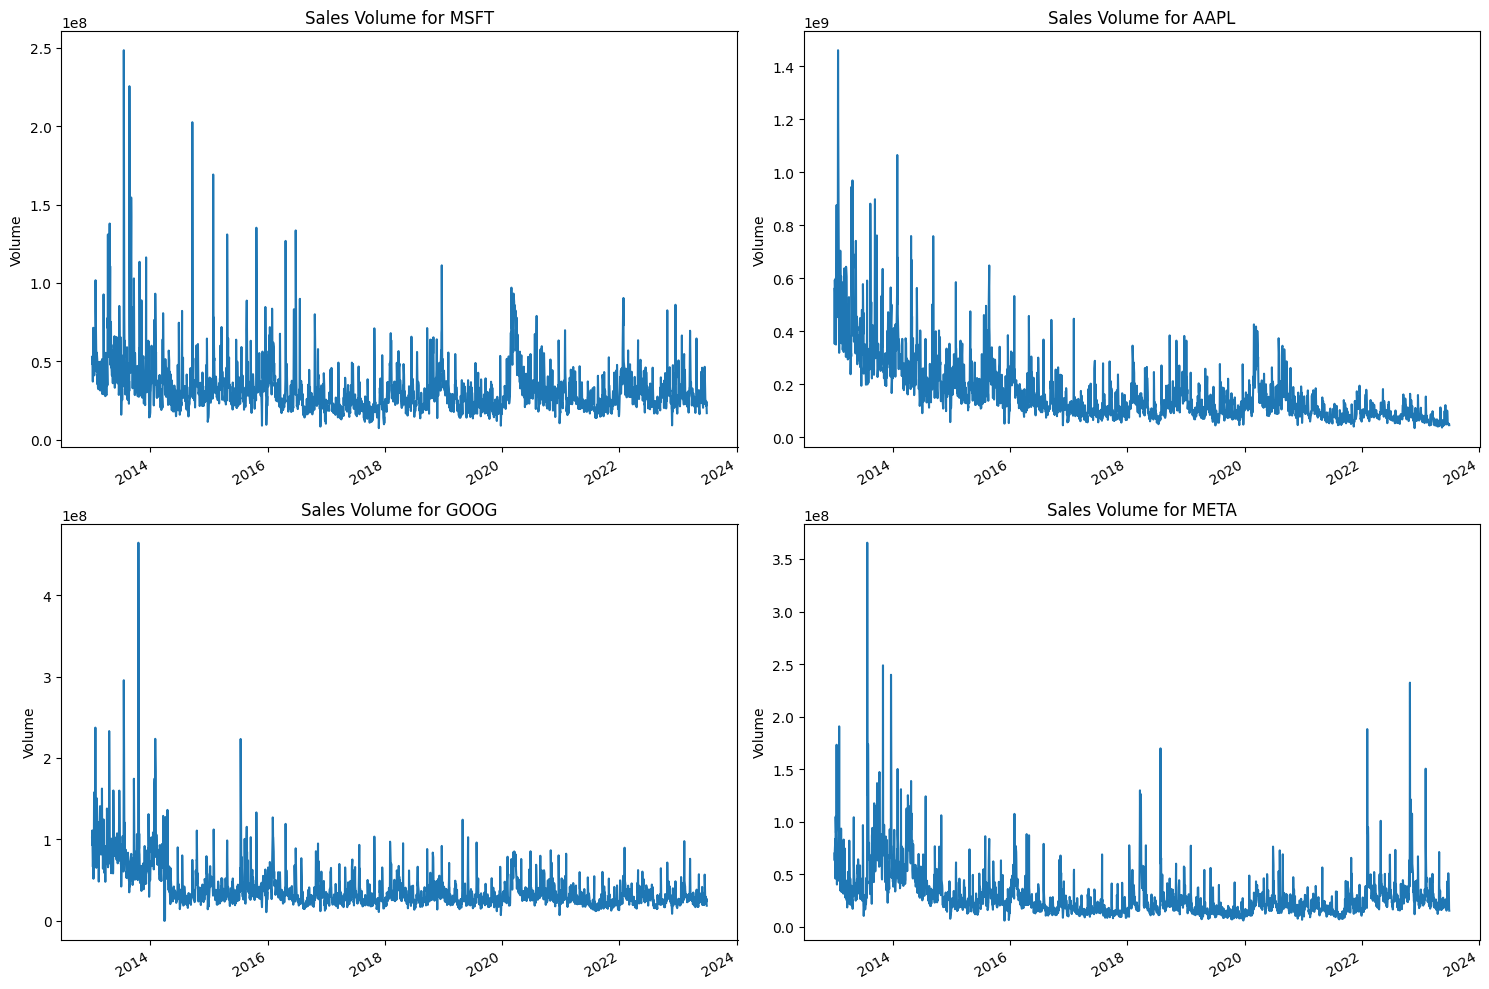

In [34]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_symbol[i - 1]}")

plt.tight_layout()


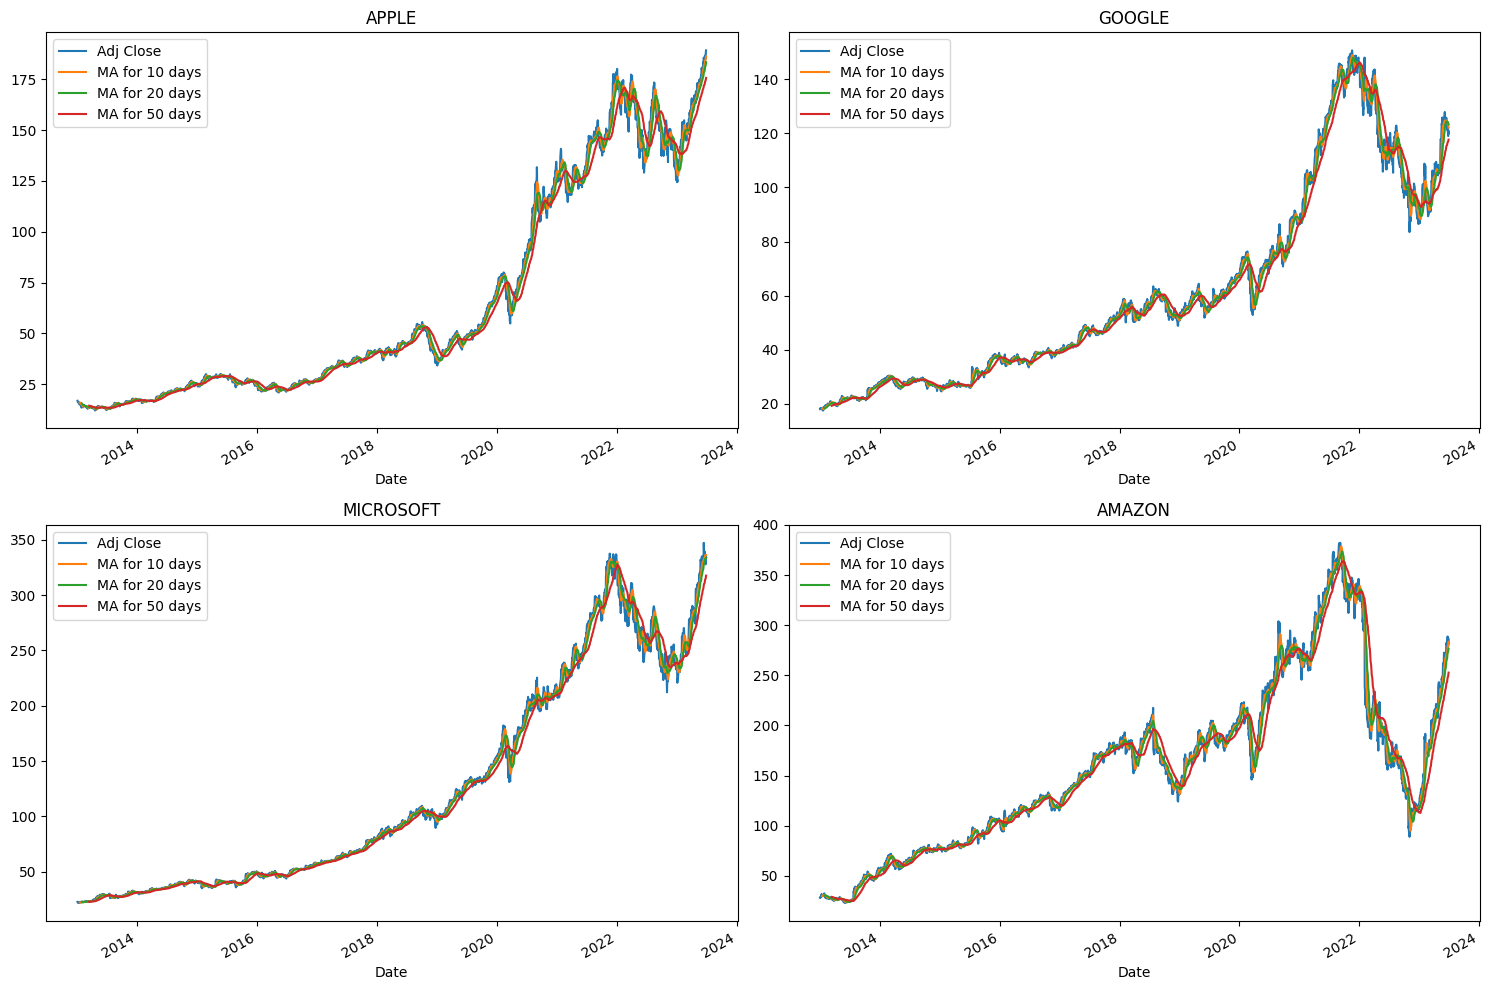

In [35]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


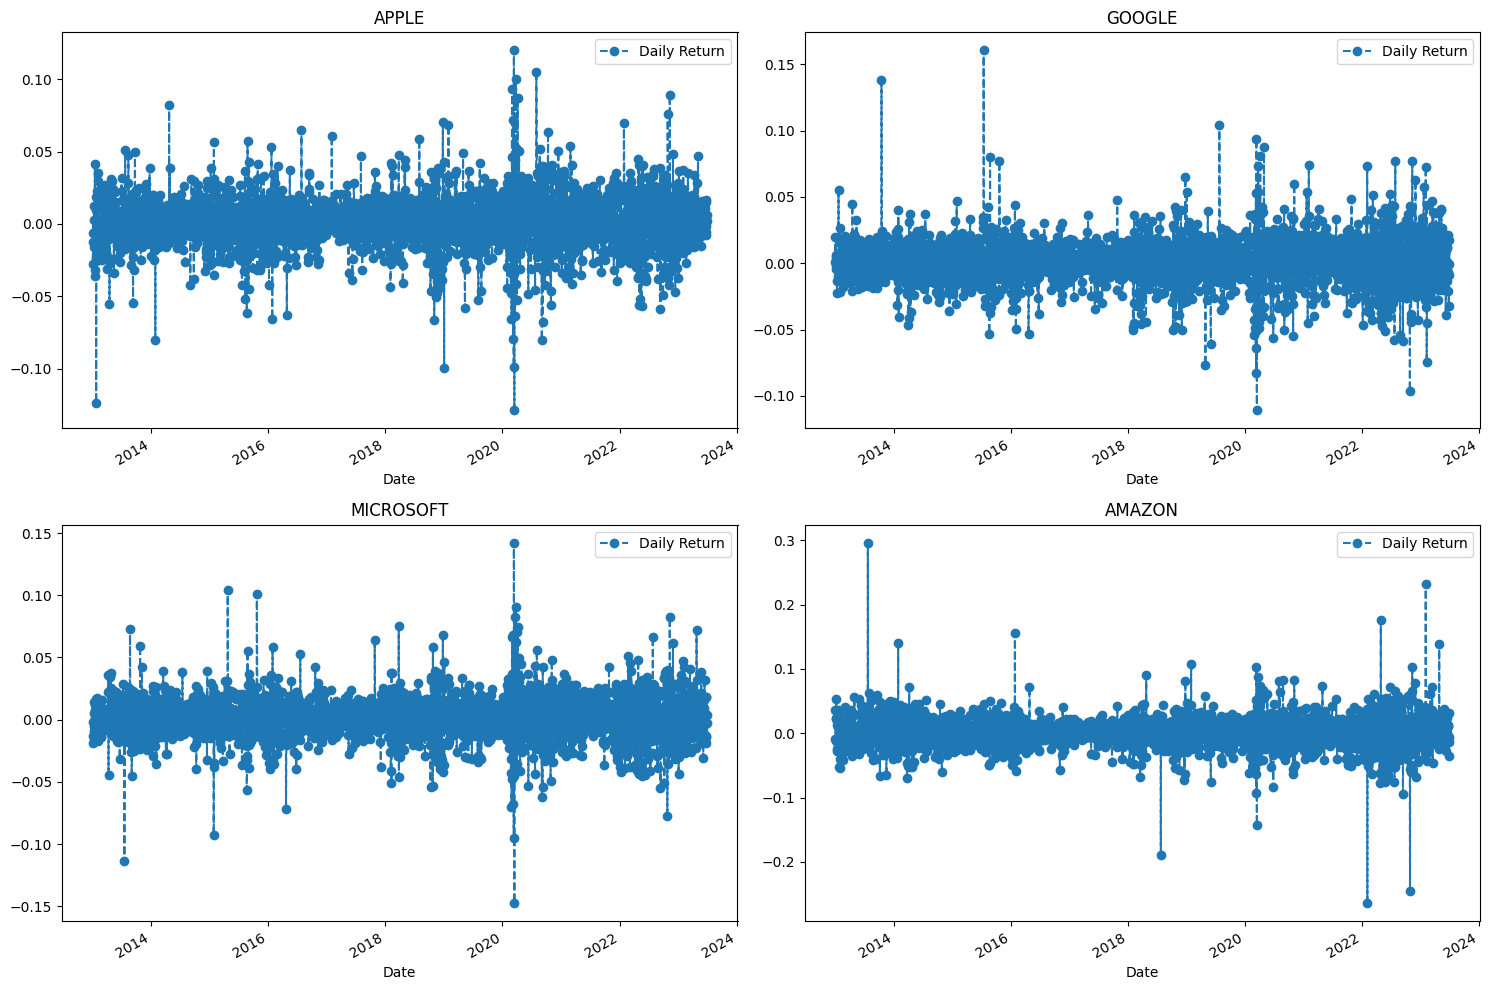

In [36]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

META['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


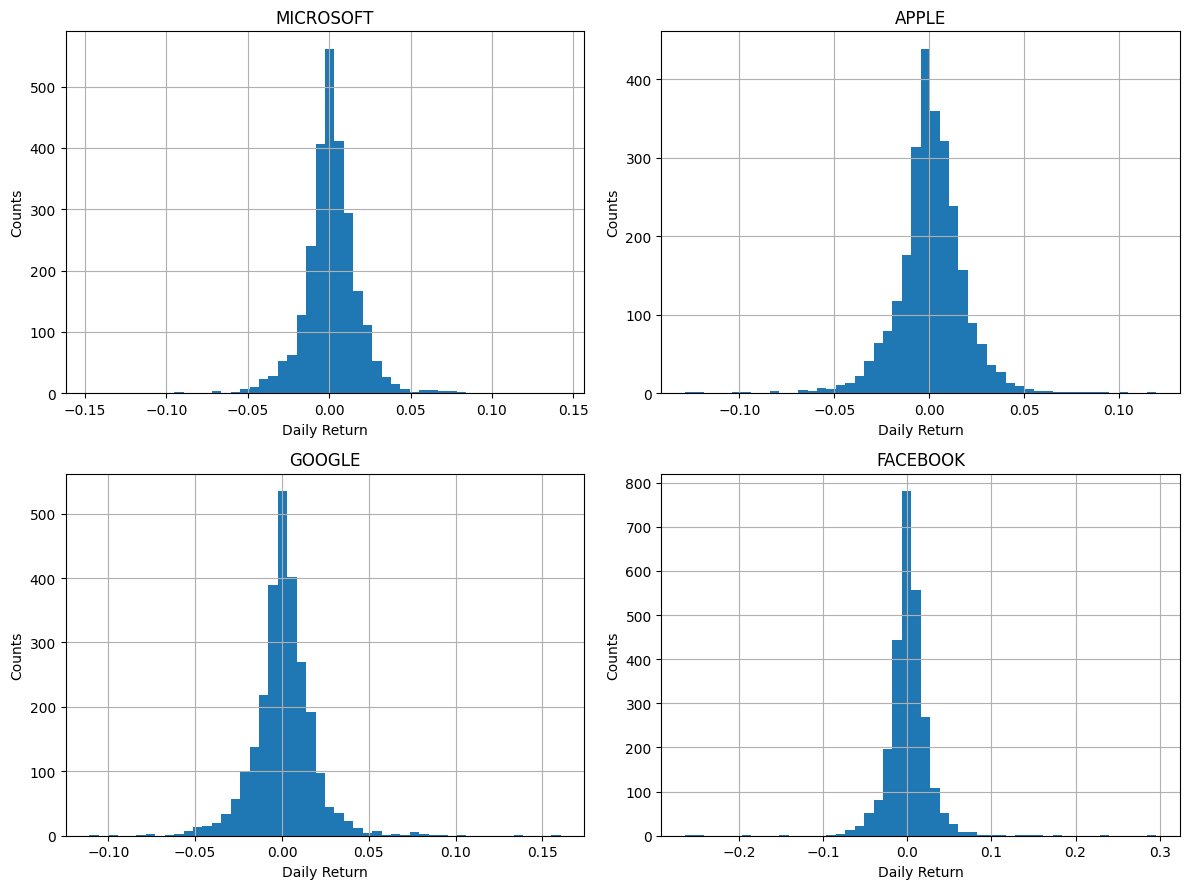

In [37]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()


# Not done

In [38]:
closing_df = pdr.get_data_yahoo(stock_symbol, start=start_date, end=end_date)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%%**********************]  4 of 4 completed


,AAPL,GOOG,META,MSFT
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.000581,-0.008214,-0.013396
2013-01-04,-0.027854,0.019760,0.035650,-0.018715
2013-01-07,-0.005883,-0.004363,0.022949,-0.001870
2013-01-08,0.002691,-0.001974,-0.012237,-0.005245


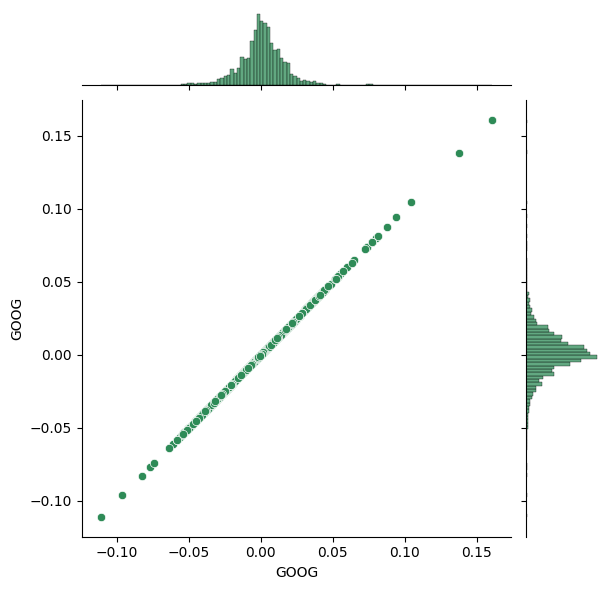

In [39]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


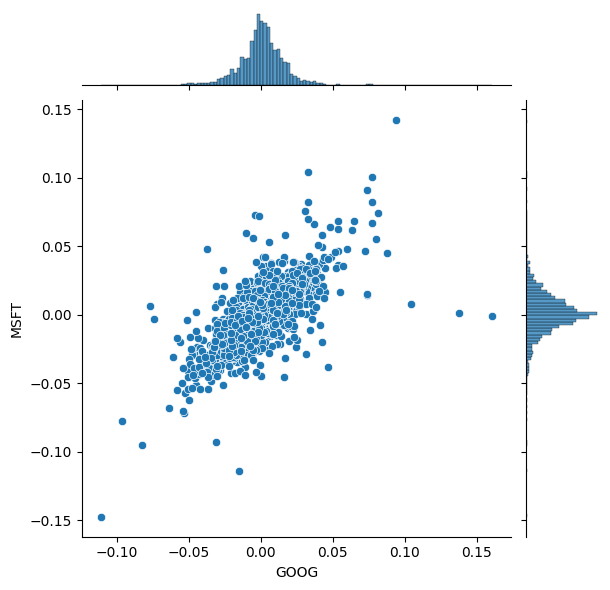

In [40]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


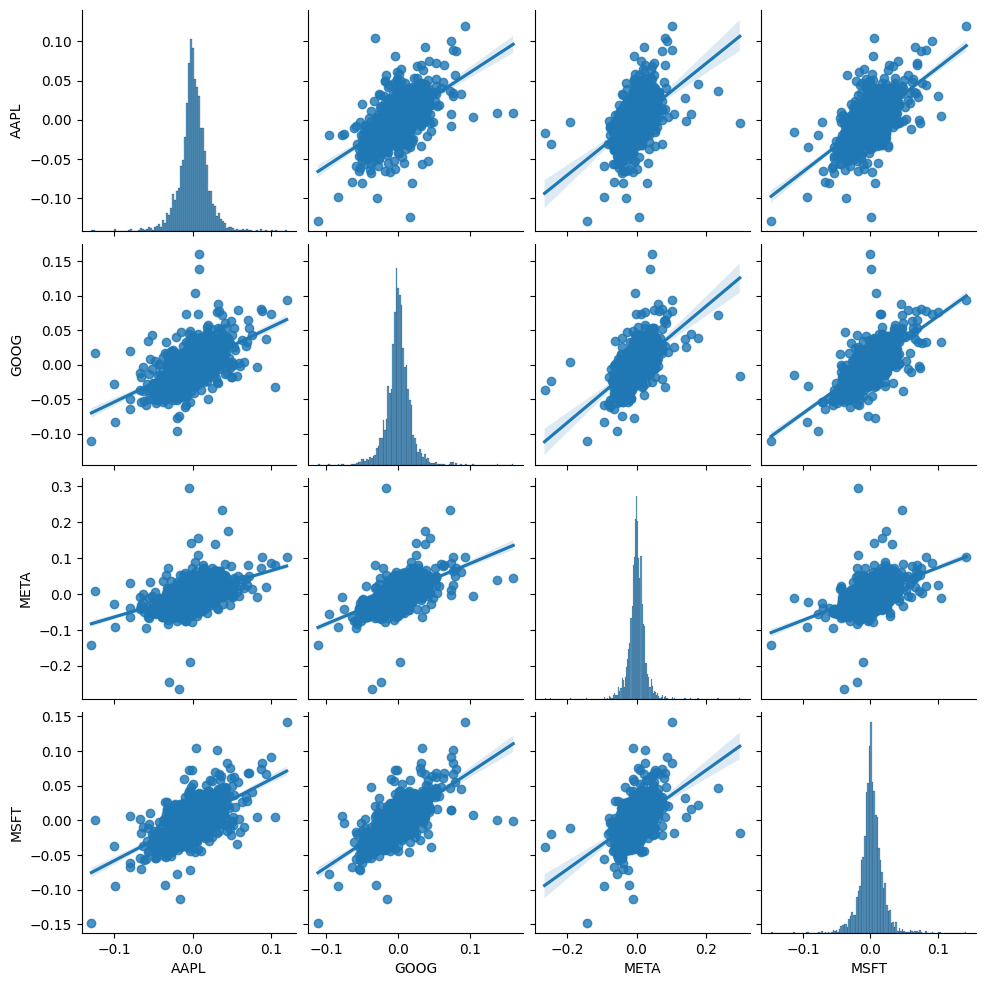

In [41]:
sns.pairplot(tech_rets, kind='reg')


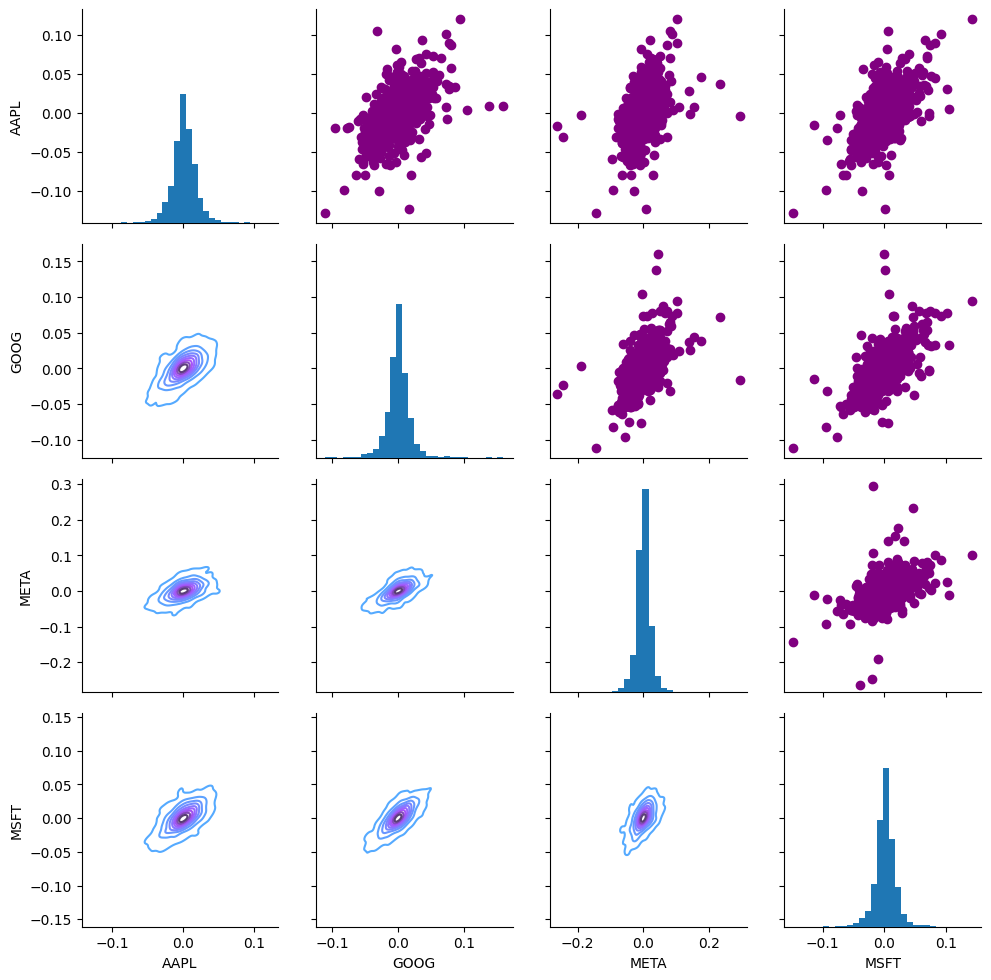

In [42]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


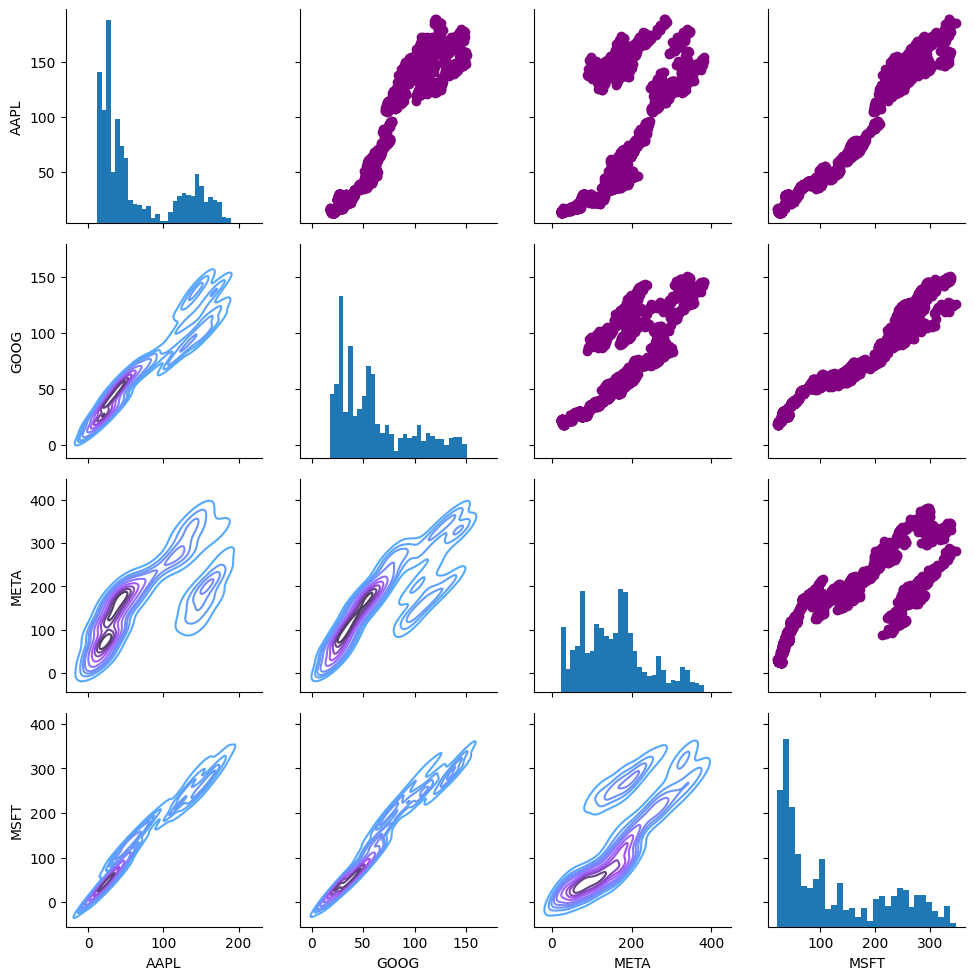

In [43]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

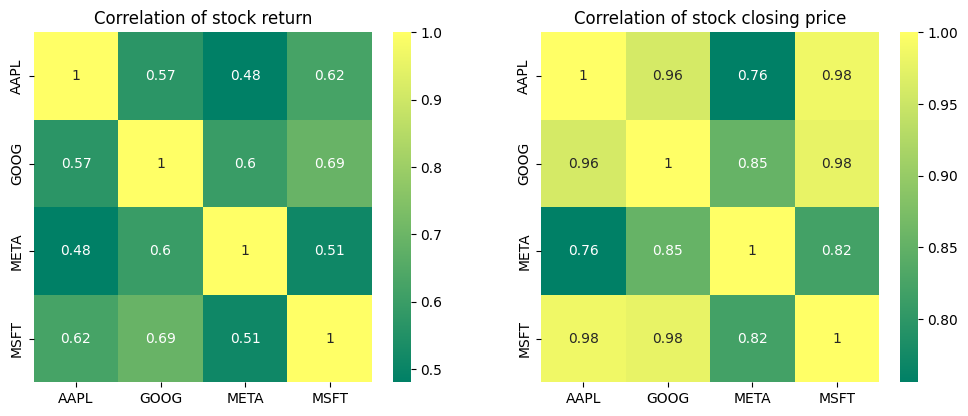

In [44]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')


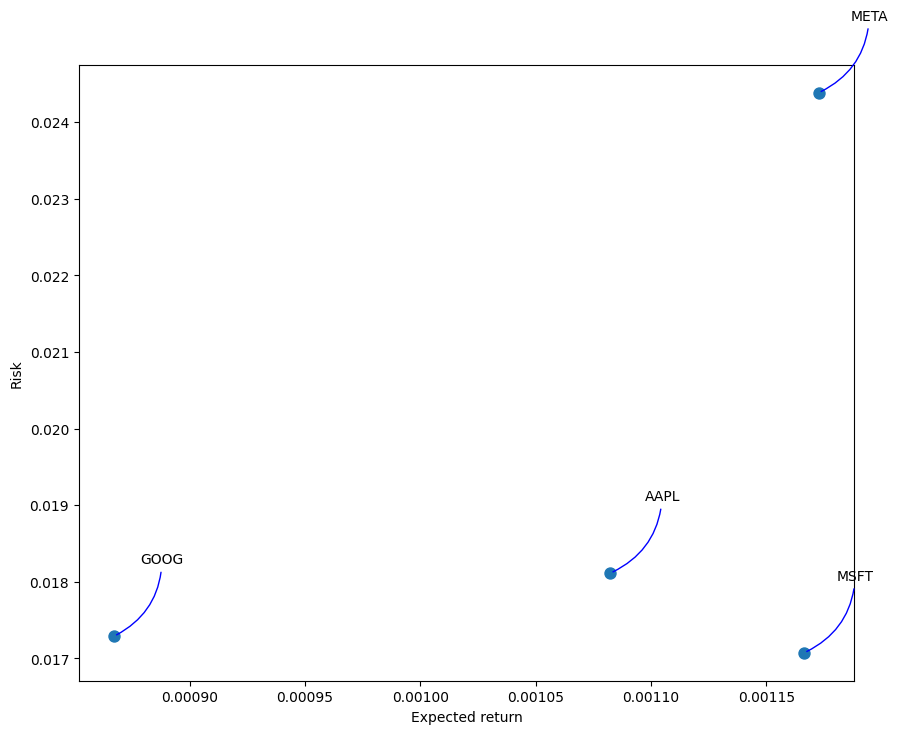

In [45]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


# Prediction of the stock price of a company using LSTM

In [46]:
df = pdr.get_data_yahoo('AAPL', start_date, end_date)
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791183,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579241,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117435,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022621,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065742,458707200
...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.428238,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.020157,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,187.806381,50730800


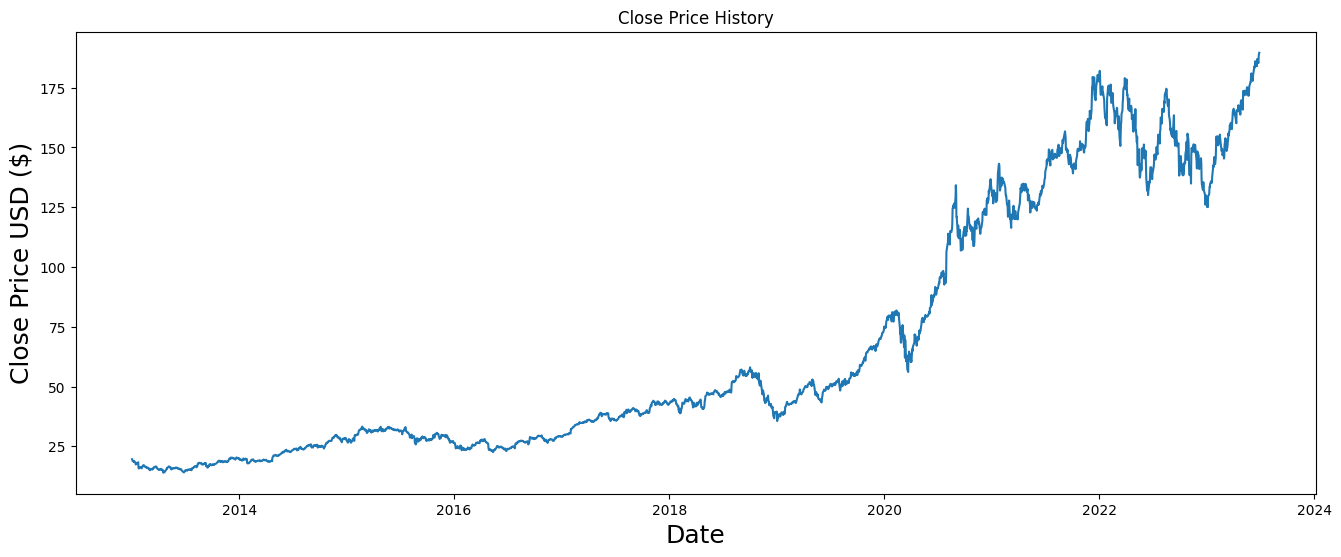

In [47]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [48]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len


2509

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.03222861],
       [0.0308195 ],
       [0.02774914],
       ...,
       [0.99128913],
       [0.99806427],
       [1.        ]])

In [50]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.03222861, 0.0308195 , 0.02774914, 0.0271188 , 0.0274055 ,
       0.02573612, 0.02703951, 0.0263868 , 0.02261493, 0.01939614,
       0.0234974 , 0.02280402, 0.0222591 , 0.023229  , 0.02510782,
       0.01219401, 0.01003459, 0.01205777, 0.01377392, 0.01348112,
       0.01320865, 0.01282841, 0.01053072, 0.01368649, 0.01358685,
       0.0157971 , 0.01717165, 0.01817815, 0.01573204, 0.01555107,
       0.01546567, 0.01415822, 0.01412365, 0.0118585 , 0.01129119,
       0.01225704, 0.01062833, 0.0118829 , 0.01098823, 0.01034366,
       0.00812121, 0.00600245, 0.00825743, 0.00714316, 0.00814357,
       0.00837537, 0.00962588, 0.0077064 , 0.00769013, 0.00853398,
       0.01080319, 0.01325542, 0.01300532, 0.01251527, 0.01264744,
       0.01451406, 0.01485363, 0.01435749, 0.01251527, 0.01059986])]
[0.0078040008425487445]

[array([0.03222861, 0.0308195 , 0.02774914, 0.0271188 , 0.0274055 ,
       0.02573612, 0.02703951, 0.0263868 , 0.02261493, 0.01939614,
       0.0234974 , 0.02280402, 0.

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)
# model.save('D:\Time-series-forecasting\model\stock_price_lstm_model.h5')


2449/2449 [==============================] - 103s 41ms/step - loss: 0.0013


In [52]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

loaded_model = load_model('D:\Time-series-forecasting\model\stock_price_lstm_model.h5')
predictions = loaded_model.predict(x_test)

# predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


5/5 [==============================] - 1s 27ms/step


3.946798731838431

C:\Users\lehun\AppData\Local\Temp\ipykernel_6140\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


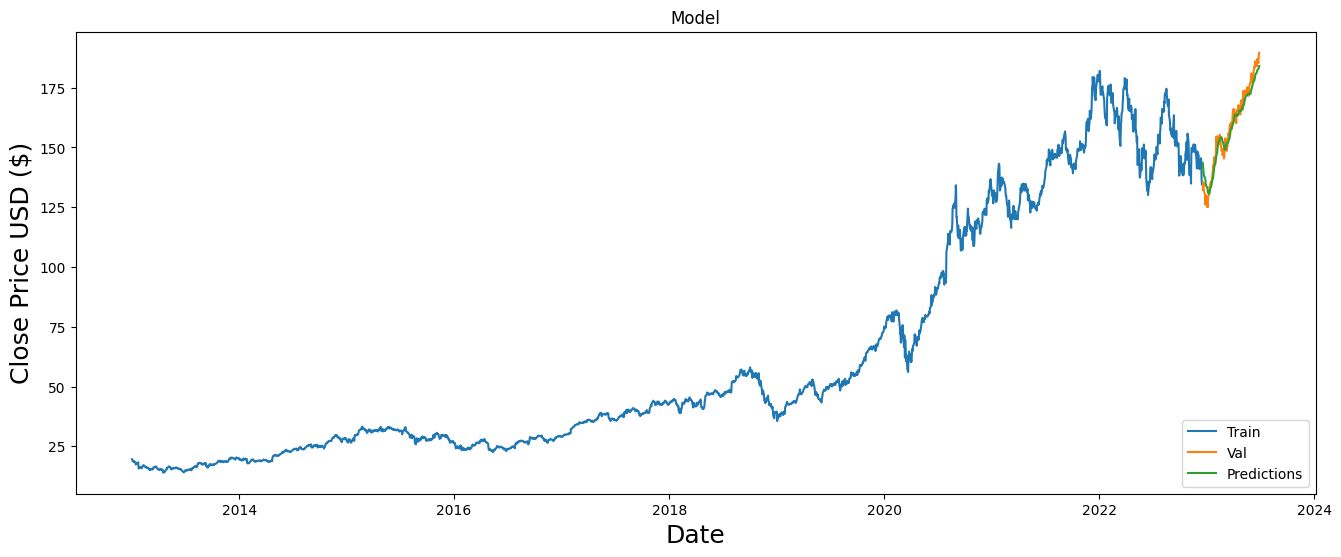

In [53]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [54]:
valid


,Close,Predictions
Date,,
2022-12-19,132.369995,143.538406
2022-12-20,132.300003,141.957687
2022-12-21,135.449997,140.355362
2022-12-22,132.229996,139.230911
2022-12-23,131.860001,138.149200
...,...,...
2023-06-23,186.679993,182.469986
2023-06-26,185.270004,182.895477
2023-06-27,188.059998,183.119904
